In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nbformat
from multidata import *

In [3]:
%run ../Limpezas/limpeza_oferta_demanda.ipynb
%run ../Limpezas/limpeza_analise_energetica.ipynb
%run ../Limpezas/limpeza_socioeconomia.ipynb

In [4]:
eletr = dict_oferta_demanda['Eletricidade']
prima = dict_analise_energetica['Produção_de_Energia_Primária']
oftin = dict_analise_energetica['Oferta_Interna_de_Energia']
dic_s = dict_dfs

Produção_de_Energia_Primária | Produção_de_Energia_Primária_% | Oferta_Interna_de_Energia | Oferta_Interna_de_Energia_% | Consumo_Final_por_Fonte | Consumo_Final_por_Fonte_% | Consumo_Final_por_Setor | Consumo_Final_por_Setor_% | Consumo_Final_Energético_por_Fonte | Consumo_Final_não_Energético_por_Fonte | Dependência_Externa_de_Energia | Composição_Setorial_do_Consumo_de_Derivados_de_Petróleo | Composição_Setorial_do_Consumo_de_Eletricidade | Composição_Setorial_do_Consumo_de_Carvão_Vapor | Composição_Setorial_do_Consumo_Final_de_Biomassa


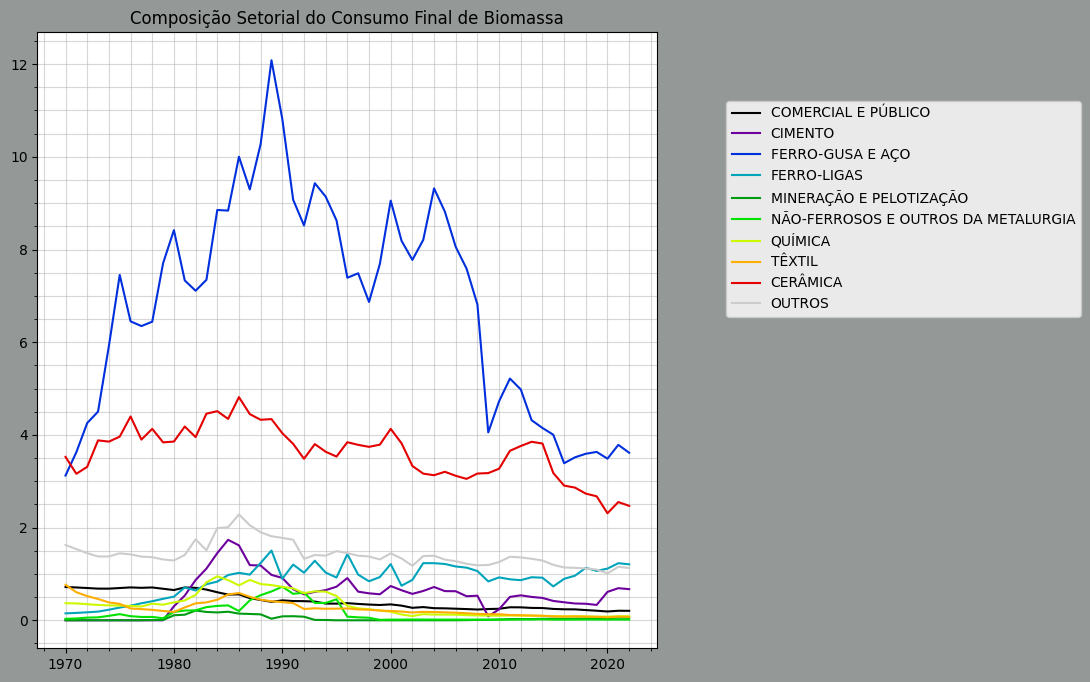

In [15]:
e = multidata(dict_analise_energetica)
print(e)
e.plotall(14, n=10)

Testes

medians:
NÃO RENOVÁVEL            51788.994558
PETRÓLEO                 40521.366504
GÁS NATURAL               9088.271237
CARVÃO VAPOR              2084.766697
CARVÃO METALÚRGICO          92.263286
URÂNIO (U3O8)               131.80765
OUTRAS NÃO RENOVÁVEIS      421.746795
RENOVÁVEL                71061.225752
ENERGIA HIDRÁULICA          22856.134
LENHA                    27406.731967
PRODUTOS DA CANA         22009.845792
EÓLICA                          0.086
SOLAR¹                      33.238553
OUTRAS RENOVÁVEIS         2785.959246
dtype: object
median:
5937.115241199999
offsets:
NÃO RENOVÁVEL            45851.879317
PETRÓLEO                 34584.251263
GÁS NATURAL               3151.155996
CARVÃO VAPOR              3852.348545
CARVÃO METALÚRGICO        5844.851955
URÂNIO (U3O8)             5805.307591
OUTRAS NÃO RENOVÁVEIS     5515.368446
RENOVÁVEL                65124.110511
ENERGIA HIDRÁULICA       16919.018759
LENHA                    21469.616726
PRODUTOS DA CANA         16072

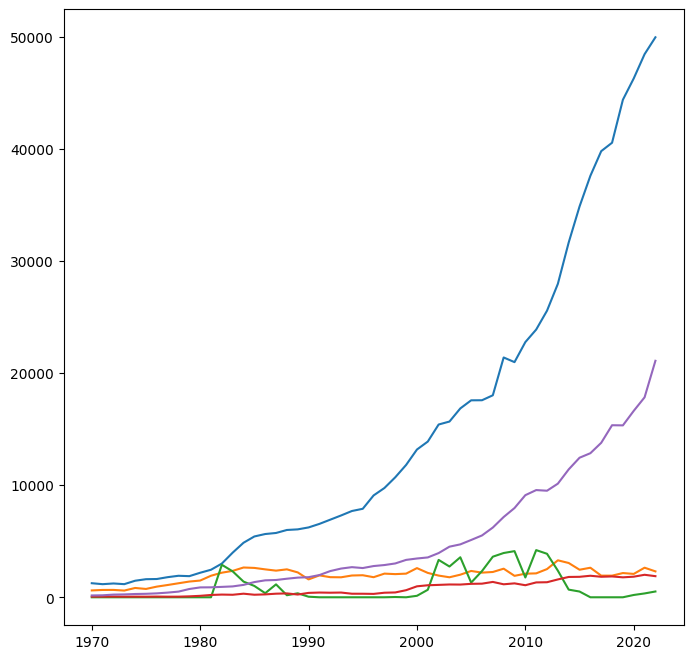

In [5]:
amount = 5
df = e[0]
pick = df.copy(deep=True)
pick.pop('ANO')

medians = pick.median()
print('medians:')
print(medians)

median = medians.median()
print('median:')
print(median)

offsets = medians.apply(lambda x: abs(x - median))
print('offsets:')
print(offsets)

offsets.sort_values(ascending=True, inplace=True)
print('sorted offsets:')
print(offsets)

pick = offsets.index.values[:amount]
print(pick)

for i in df.columns:
    if i in pick:
        plt.plot(df['ANO'], df[i], label=i)

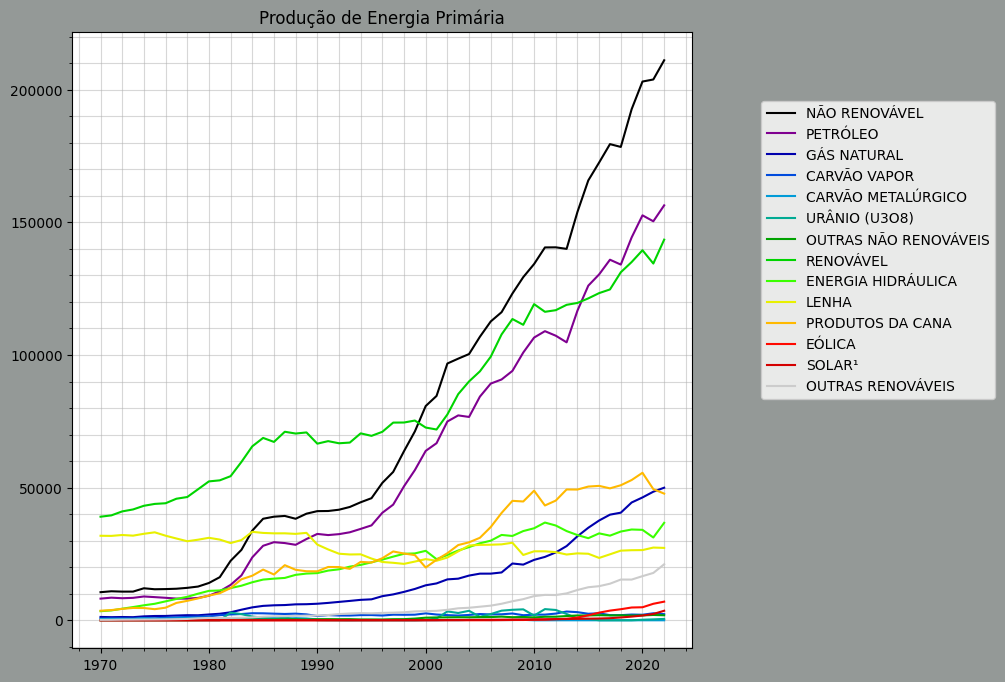

In [9]:
e.plotall(0)

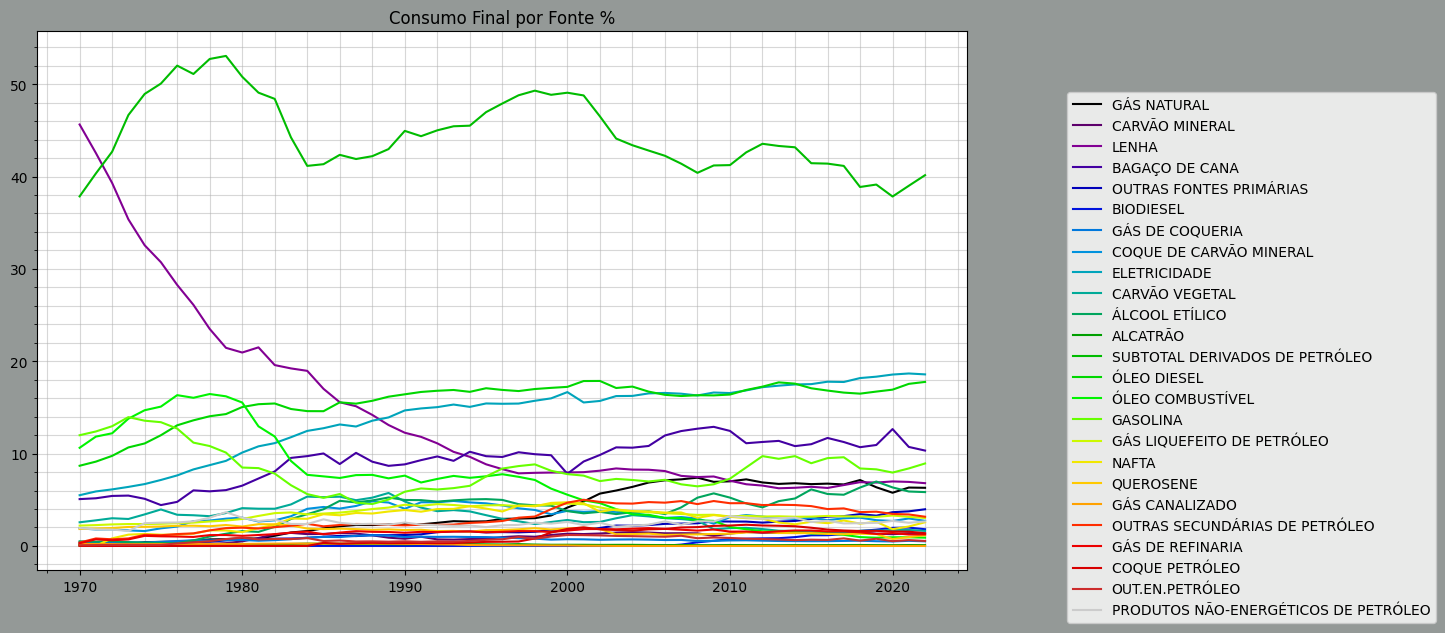

In [23]:
e.plotall(5)

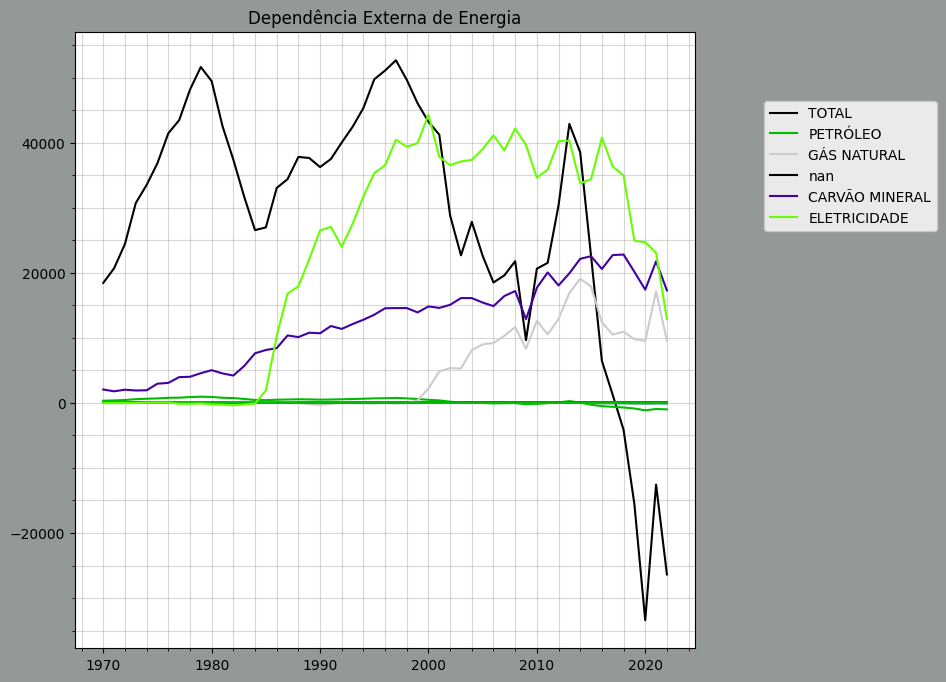

In [24]:
e.plotall(10)

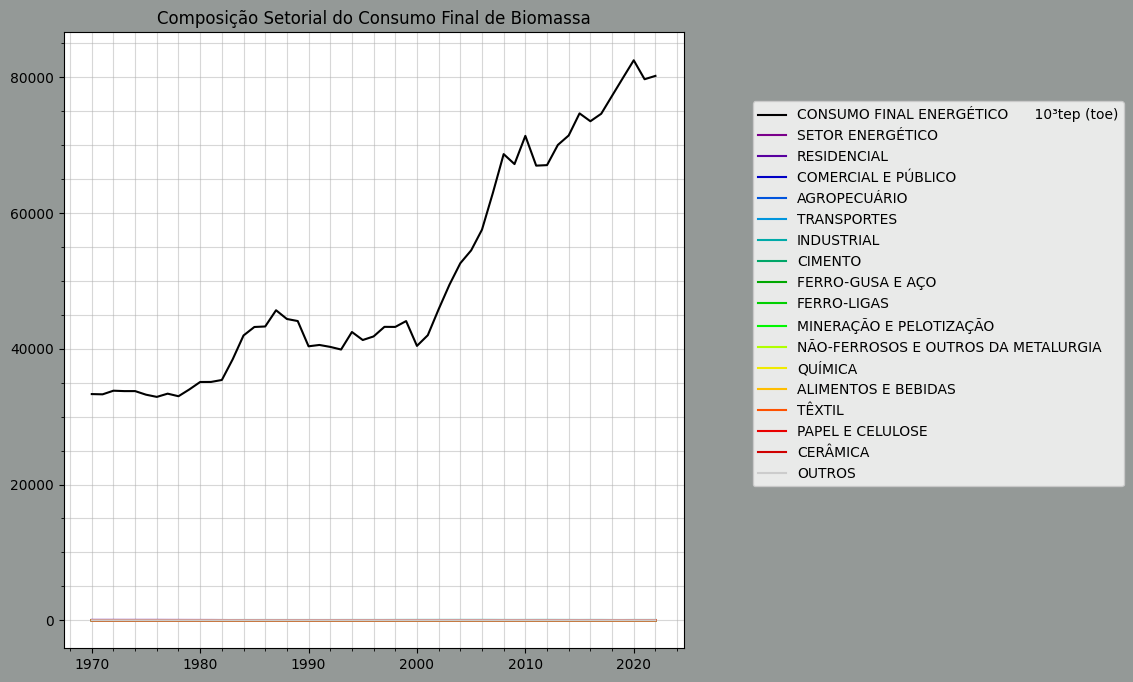

In [29]:
e.plotall(14)

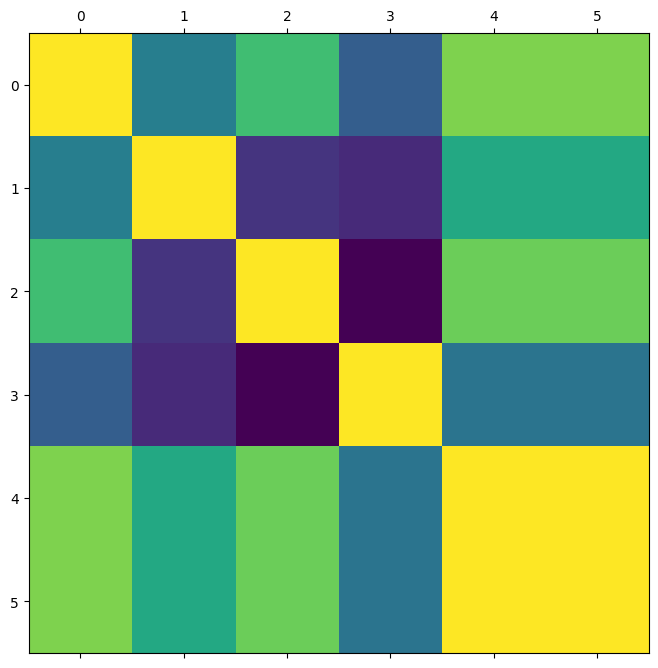

In [14]:
plt.matshow(dict_oferta_demanda['Urânio'].corr())
plt.show()